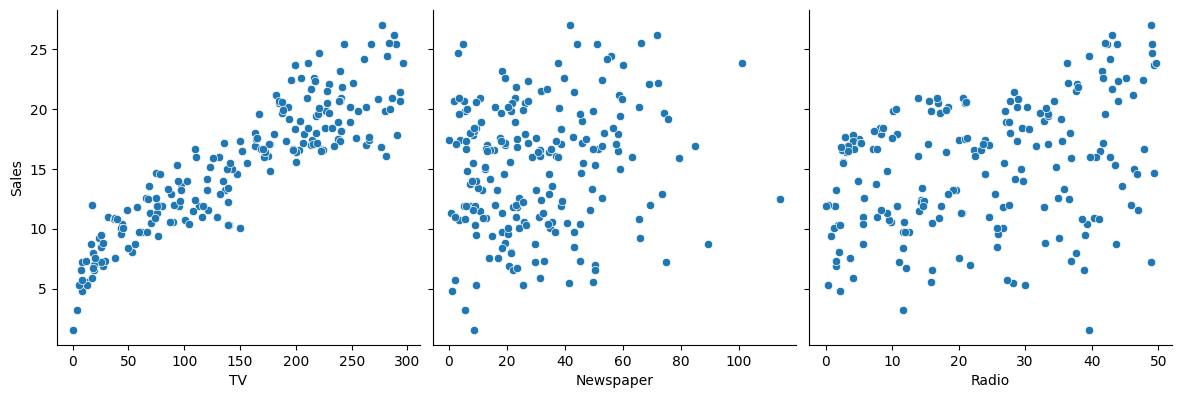

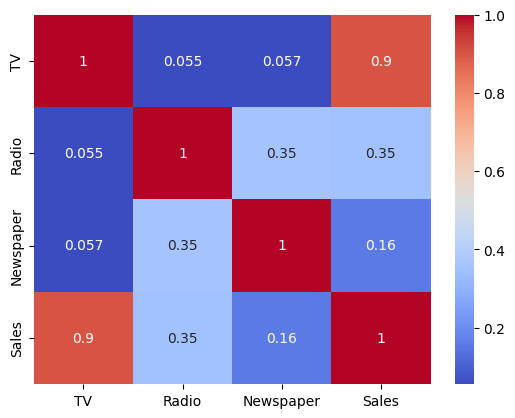

Explained Variance by Components: [0.45695084 0.32775205]
R² Score: 0.8474
MAE: 1.6823
RMSE: 2.1713


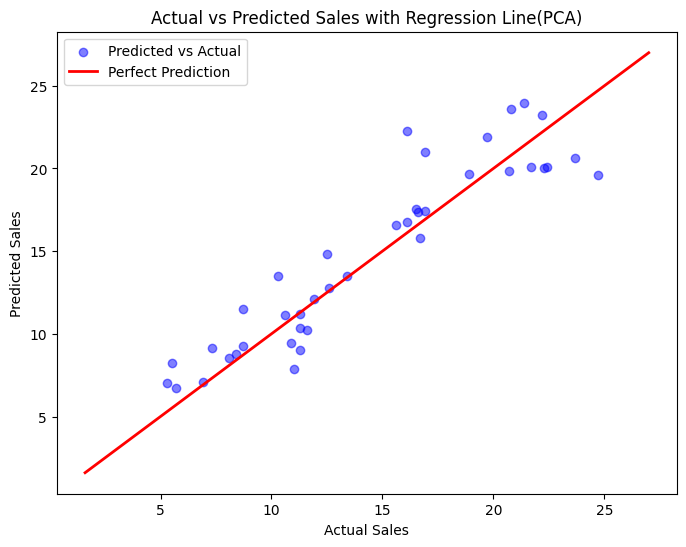

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample DataFrame
data = pd.read_csv('advertising.csv')

sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()

# Defining Features and Target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Standardizing Features (PCA requires scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Explained Variance
print(f"Explained Variance by Components: {pca.explained_variance_ratio_}")

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Regression Metrics
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Scatter Plot: Actual vs Predicted Sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales with Regression Line(PCA)")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Sample DataFrame
data = pd.read_csv('advertising.csv')

# Convert Sales into Categorical Classes for LDA
data['Sales_Category'] = pd.qcut(data['Sales'], q=2, labels=[0, 1])  # Two categories (Low, High)

# Defining Features and Target for LDA
X = data[['TV', 'Radio', 'Newspaper']]
y_lda = data['Sales_Category']  # LDA requires categorical target

# Standardizing Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Reduce to 1 component
X_lda = lda.fit_transform(X_scaled, y_lda)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_lda, data['Sales'], test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Regression Metrics
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Scatter Plot: Actual vs Predicted Sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([data['Sales'].min(), data['Sales'].max()],
         [data['Sales'].min(), data['Sales'].max()],
         color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales with Regression Line (LDA)")
plt.legend()
plt.show()

R²: 0.8701, MAE: 1.5407, RMSE: 2.0035


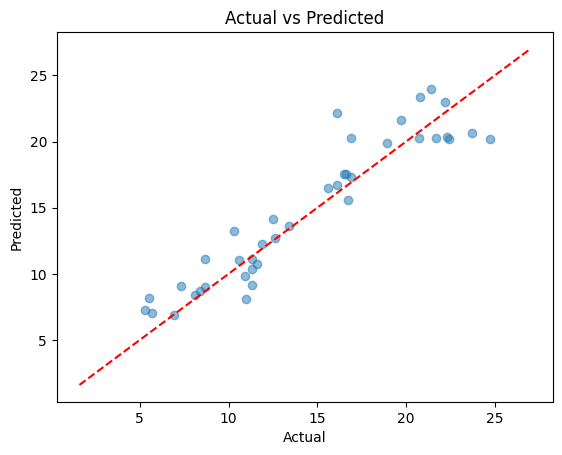

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('advertising.csv')
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('lr', LinearRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(f"R²: {r2_score(y_test, y_pred):.4f}, MAE: {mean_absolute_error(y_test, y_pred):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


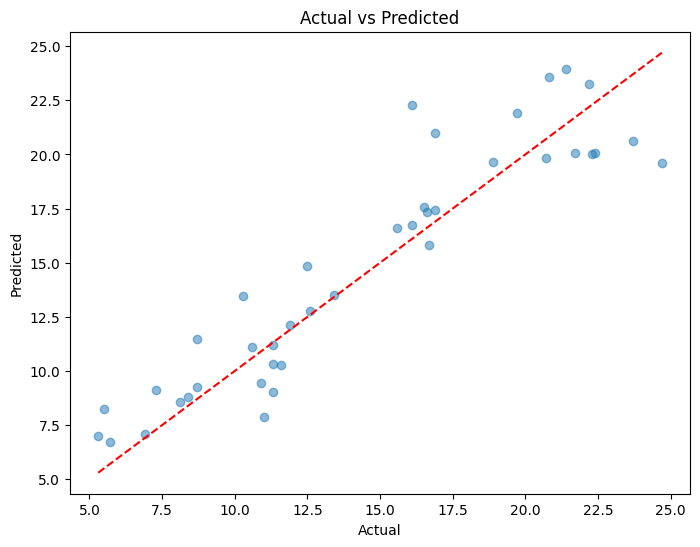

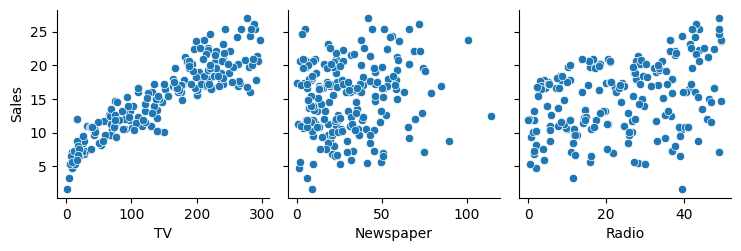

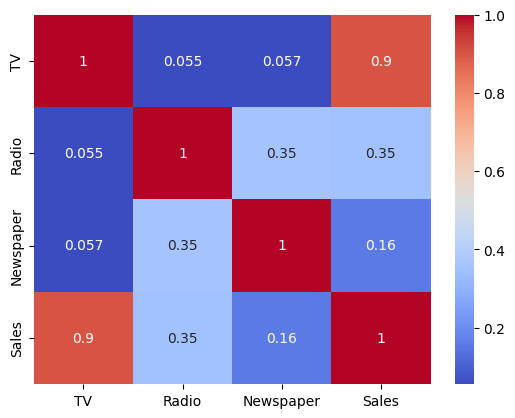

In [5]:
def plot_actual_vs_pred(y_test, y_pred):
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()
def quick_eda(df):
    sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales')
    plt.show()
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.show()

plot_actual_vs_pred(y_test, y_pred)
quick_eda(data)